<a href="https://colab.research.google.com/github/taimoorsardar/Deep-Learning-Projects/blob/main/CnnFromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##importing libraries

In [ ]:
import numpy as np

##Define the Network Architecture

In [ ]:
# Define the architecture of the neural network
input_size = 1
hidden_size = 1
output_size = 1

##Initialize Weights and Biases

In [ ]:
# Xavier Initialization function as we will be using sigmoid function later on that's why
def xavier(size):
    return np.random.randn(*size) * np.sqrt(1.0 / size[0])

# Initialize weights and biases
W1 = xavier((input_size, hidden_size))
b1 = np.zeros((1, hidden_size))
W2 = xavier((hidden_size, output_size))
b2 = np.zeros((1, output_size))


##Define the Activation Function (Sigmoid)

In [ ]:
# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

##Forward Pass

In [ ]:
def forward(input_data):
    # Input to hidden layer
    z1 = np.dot(input_data, W1) + b1
    a1 = sigmoid(z1)

    # Hidden layer to output layer
    z2 = np.dot(a1, W2) + b2
    output = sigmoid(z2)

    return output, a1


##Loss Function (Mean Squared Error)

In [ ]:
def loss(predicted_output, target_output):
    return np.mean((predicted_output - target_output) ** 2)

##Backward Pass (Backpropagation)

In [ ]:
# Derivative of the sigmoid function for backpropagation
def sigmoid_derivative(x):
    return x * (1 - x)

In [ ]:
def backward(input_data, a1, predicted_output, target_output, learning_rate):
    # Declare global variables
    global W1, b1, W2, b2

    # Compute the error in the output layer
    output_error = predicted_output - target_output
    d_output = output_error * sigmoid_derivative(predicted_output)

    # Gradients for W2 and b2
    dW2 = np.dot(a1.T, d_output)
    db2 = np.sum(d_output, axis=0, keepdims=True)

    # Error in the hidden layer
    hidden_error = np.dot(d_output, W2.T)
    d_hidden = hidden_error * sigmoid_derivative(a1)

    # Gradients for W1 and b1
    dW1 = np.dot(input_data.T, d_hidden)
    db1 = np.sum(d_hidden, axis=0, keepdims=True)

    # Update the weights and biases
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2


##Training Loop

In [ ]:
# Define the number of epochs
num_epochs = 1000

# Training loop
for epoch in range(num_epochs):
    # Define input data and targets
    input_data = np.array([[0], [1]])
    target = np.array([[0], [1]])

    # Forward pass
    predicted_output, hidden_layer_activation = forward(input_data)

    # Compute current loss
    current_loss = loss(predicted_output, target)

    # Backpropagation
    backward(input_data, hidden_layer_activation, predicted_output, target, learning_rate=0.1)

    # Print the current loss every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss = {current_loss}")


Epoch 0: Loss = 0.2875406341241062
Epoch 100: Loss = 0.26554819889323816
Epoch 200: Loss = 0.25861694012307024
Epoch 300: Loss = 0.25493239635391535
Epoch 400: Loss = 0.252743490230619
Epoch 500: Loss = 0.2513786525202577
Epoch 600: Loss = 0.25042763145751035
Epoch 700: Loss = 0.24959741629837429
Epoch 800: Loss = 0.24862970778746502
Epoch 900: Loss = 0.2472309705637929


##Test the Trained Model

In [ ]:
# Define test data
test_data = np.array([[0.5]])

# Perform forward pass with the trained model
predicted_output, _ = forward(test_data)

# Print the predicted output
print("Predicted output for test data [0.5]:", predicted_output)


Predicted output for test data [0.5]: [[0.49137673]]


##Import any necessary Libraries

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

##Data

In [ ]:
# Step 2: Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Step 3: Preprocess data
# Perform one-hot encoding on target labels
encoder = OneHotEncoder(sparse=False)
encoded_target = encoder.fit_transform(y.reshape(-1, 1))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, encoded_target, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train: (120, 4)
Shape of y_train: (120, 3)


##Defining Network Architecture

In [ ]:
# Define the architecture of the neural network
input_size = 4  # Number of input features in the Iris dataset
hidden_size = 8  # Number of neurons in the hidden layer (hyperparameter)
output_size = 3  # Number of output classes in the Iris dataset

##Initializing weights and biases

In [ ]:
# Initialize weights and biases for the first hidden layer
W1 = np.random.randn(input_size, hidden_size)  # Weights connecting input to hidden layer
b1 = np.zeros((1, hidden_size))  # Biases for the hidden layer

# Initialize weights and biases for the output layer
W2 = np.random.randn(hidden_size, output_size)  # Weights connecting hidden to output layer
b2 = np.zeros((1, output_size))  # Biases for the output layer

# Print the shapes of weights and biases
print("Shape of W1:", W1.shape)
print("Shape of b1:", b1.shape)
print("Shape of W2:", W2.shape)
print("Shape of b2:", b2.shape)

Shape of W1: (4, 8)
Shape of b1: (1, 8)
Shape of W2: (8, 3)
Shape of b2: (1, 3)


##Defining the Activation Function

In [ ]:
# Sigmoid activation function for the hidden layer
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Softmax activation function for the output layer
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)


##Forward Pass

In [ ]:
def forward(X):
    # Compute input of the hidden layer
    hidden_input = np.dot(X, W1) + b1
    #print("Shape of hidden_input:", hidden_input.shape)

    # Apply sigmoid activation function to compute hidden layer activations
    hidden_output = sigmoid(hidden_input)

    # Compute input of the output layer
    output_input = np.dot(hidden_output, W2) + b2
    #print("Shape of output_input:", output_input.shape)

    # Apply softmax activation function to compute output probabilities
    output_probs = softmax(output_input)

    return output_probs


##Loss Function (Cross Entropy Loss)

In [ ]:
def loss(predicted_probs, target):
    # Compute the cross-entropy loss
    loss = -np.mean(np.sum(target * np.log(predicted_probs), axis=1))
    return loss


##Backward Pass (Back propagation)

In [ ]:
def backward(X, predicted_probs, target, learning_rate):
    global W1, b1, W2, b2

    # Compute the input and output of the hidden layer
    hidden_input = np.dot(X, W1) + b1
    hidden_output = sigmoid(hidden_input)

    # Compute the error in the output layer
    error_output = predicted_probs - target
    #print("Shape of error_output:", error_output.shape)

    # Compute gradients for weights and biases of the output layer
    dW2 = np.dot(hidden_output.T, error_output)
    db2 = np.sum(error_output, axis=0, keepdims=True)

    # Compute error in the hidden layer
    error_hidden = np.dot(error_output, W2.T) * hidden_output * (1 - hidden_output)
    #print("Shape of error_hidden:", error_hidden.shape)

    # Compute gradients for weights and biases of the hidden layer
    dW1 = np.dot(X.T, error_hidden)
    db1 = np.sum(error_hidden, axis=0, keepdims=True)

    # Update weights and biases using gradients and learning rate
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2


##Training Loop

In [ ]:
# Define the number of epochs
num_epochs = 1000

# Training loop
for epoch in range(num_epochs):
    # Define input data and targets
    input_data = X_train
    target = y_train

    # Forward pass
    predicted_probs = forward(input_data)

    # Compute current loss
    current_loss = loss(predicted_probs, target)

    # Backpropagation
    backward(input_data, predicted_probs, target, learning_rate=0.01)

    # Print the current loss every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss = {current_loss}")


Epoch 0: Loss = 0.08944302060366034
Epoch 100: Loss = 0.08259734842531831
Epoch 200: Loss = 0.06539489647977002
Epoch 300: Loss = 0.062436517264631196
Epoch 400: Loss = 0.060494257654960644
Epoch 500: Loss = 0.05922375635990677
Epoch 600: Loss = 0.058432622458125125
Epoch 700: Loss = 0.058150501336541455
Epoch 800: Loss = 0.05799985539047509
Epoch 900: Loss = 0.05791786791331643


##Testing the Trained Model

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Forward pass on test data
predicted_probs_test = forward(X_test)

# Convert predicted probabilities to class labels
predicted_labels_test = np.argmax(predicted_probs_test, axis=1)
true_labels_test = np.argmax(y_test, axis=1)

# Compute performance metrics
accuracy = accuracy_score(true_labels_test, predicted_labels_test)
precision = precision_score(true_labels_test, predicted_labels_test, average='weighted')
recall = recall_score(true_labels_test, predicted_labels_test, average='weighted')
f1 = f1_score(true_labels_test, predicted_labels_test, average='weighted')

# Print performance metrics
print("Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


Performance Metrics:
Accuracy: 0.9667
Precision: 0.9694
Recall: 0.9667
F1-score: 0.9664


###Visualization of metrics

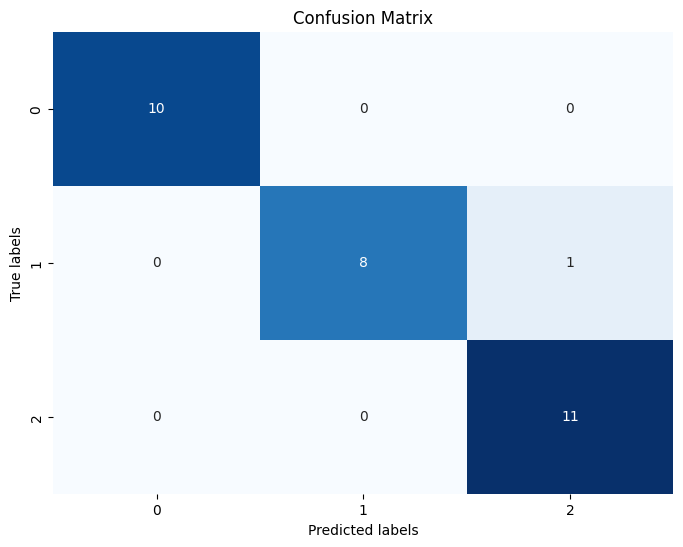

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels_test, predicted_labels_test)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


<ipython-input-37-ed371b4b4683>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=scores, palette='viridis')


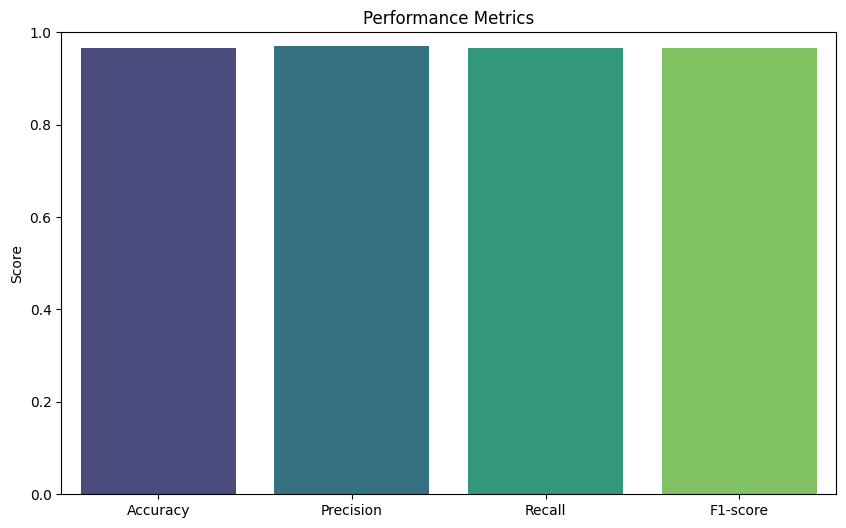

In [ ]:
# Plot performance metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
scores = [accuracy, precision, recall, f1]

plt.figure(figsize=(10, 6))
sns.barplot(x=metrics, y=scores, palette='viridis')
plt.title('Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()
